# Simulations

This notebook demonstrates numerical simulations relating to Cohen's d effect sizes. The main purpose of the simulations is to numerically verify analytical d-value survival functions (SFs).

The simulations below use a relatively small number of iterations: `niter=1000`.  Increase this to 10000 or 100000 for closer agreement with analytical results.

Refer to the **sim.py** script in the "analysis/sim" folder for full details of simulations considered in the manuscript.

<br>
<br>

Let's first import all necessary packages necessary to execute this notebook:

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import rft1d
import esrot1d as e1d

<br>

Let's define constants that will be used across simulations:

<br>

In [2]:

# constants for all simulations:
niter  = 1000  # number of iterations (i.e., random samples) for numerical simulations
u0     = np.linspace(0, 2, 51)    # d-value thresholds for analytical SFs
u1     = np.arange(0, 2.1, 0.25)  # d-value thresholds for numerical SFs

# constants for functional simulations:
Q      = 101  # number of discrete nodes used to approximate continuous one-dimensional functions
fwhm   = 20   # functional smoothness (full-width-at-half-maximum)


<br>

Let's also define a generic `plot_results` function for plotting analytical and simulated survival functions.

<br>

In [3]:

def plot_results(u0, sf0, u1, sf1):
    '''
    Plot analytical and numerical survival functions (SFs)
    
    Inputs:

    * u0  : d-value thresholds for analytical SFs
    * sf0 : list of analytical SFs (three SFs used in all simulations below)
    * u1  : d-value thresholds for SFs from numerical simulation
    * sf1 : list of numerical SFs (three SFs used in all simulations below)
    '''
    
    fig,ax  = plt.subplots(1, 1, figsize=(6,4), tight_layout=True)
    colors  = ['r', 'g', 'b']
    for i,c in enumerate(colors):
        ax.plot(u0, np.log10(sf0[i]), color=c )
        ax.plot(u1, np.log10(sf1[i]), 'o', color=c )
    ax.set_ylim(-5, 0)
    ax.set_xlabel('u', size=14)
    ax.set_ylabel( r'log$_{10}$( P(d>u) )', size=14)
    e1d.util.custom_legend(ax, colors=colors+['k','k'], labels=[f'n={nn}' for nn in n]+['Analytical','Simulation'], linestyles=['-','-','-','-','o'], linewidths=[2,2,2,2,None], markersizes=[None,None,None,5,5])
    plt.show()
    

<br>
<br>

## One-sample, 0D

Simulations for the one-sample case involving simple scalar (0D) Gaussian random data.

Three sample sizes `n` are considered.

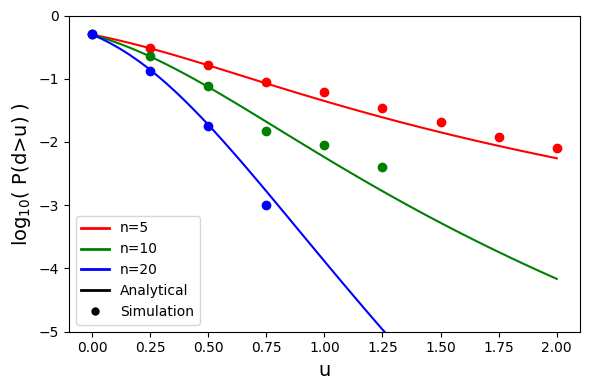

In [4]:

# analytical survival functions:
n      = [5, 10, 20]  # sample sizes
sf0    = e1d.stats.d2p(u0, n, dim=0, design='1sample')


# simulate:
np.random.seed(5)
sf1    = []
for nn in n:
    d  = []
    for i in range(niter):
        y  = np.random.randn(nn)
        d.append( e1d.stats.d_1sample(y) )
    d  = np.asarray( d )
    f  = np.array(   [(d>uu).mean()  for uu in u1]   )
    f[f==0] = np.nan
    sf1.append( f )
sf1    = np.array( sf1 )
plot_results(u0, sf0, u1, sf1)


<br>
<br>

## Two-sample, 0D

Simulations for a two-sample case involving simple scalar (0D) Gaussian random data. For simplicity equal group sizes and equal group variances are assumed.

Three sample sizes `n` are considered.

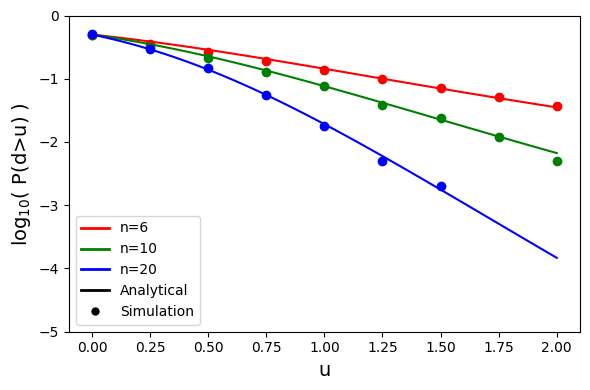

In [5]:

# analytical survival functions:
n      = [6, 10, 20]
sf0    = e1d.stats.d2p(u0, n, dim=0, design='2sample')


# simulate:
np.random.seed(0)
sf1    = []
for nn in n:
    d  = []
    for i in range(niter):
        y0  = np.random.randn( int(nn/2) )
        y1  = np.random.randn( int(nn/2) )
        d.append( e1d.stats.d_2sample(y0, y1) )
    d  = np.asarray( d )
    f  = np.array(   [(d>uu).mean()  for uu in u1]   )
    f[f==0] = np.nan
    sf1.append( f )
sf1    = np.array( sf1 )
plot_results(u0, sf0, u1, sf1)


<br>
<br>

## One-sample, 1D

Simulations for the one-sample case involving 1D Gaussian random fields.

Three sample sizes `n` are considered.

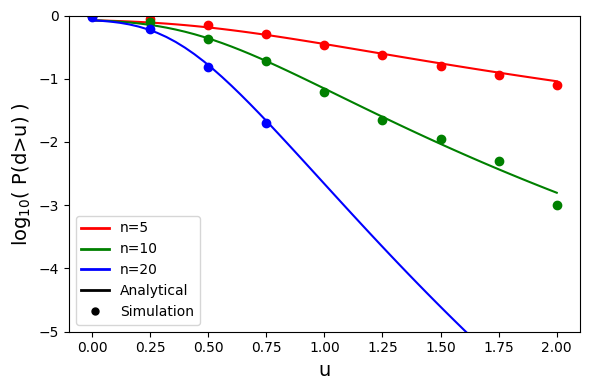

In [6]:

# analytical survival functions:
n      = [5, 10, 20]
sf0    = e1d.stats.d2p(u0, n, dim=1, design='1sample', Q=Q, fwhm=fwhm)


# simulate:
np.random.seed(2)
sf1    = []
for nn in n:
    d  = []
    for i in range(niter):
        y  = rft1d.randn1d(nn, Q, fwhm)
        d.append( e1d.stats.d_1sample(y).max() )
    dmax = np.asarray( d )
    f    = np.array(   [(dmax>uu).mean()  for uu in u1]   )
    f[f==0] = np.nan
    sf1.append( f )
sf1    = np.array( sf1 )
plot_results(u0, sf0, u1, sf1)


<br>
<br>

## Two-sample, 1D

Simulations for a two-sample case involving 1D Gaussian random fields. For simplicity equal group sizes and equal group variances are assumed.

Three sample sizes `n` are considered.

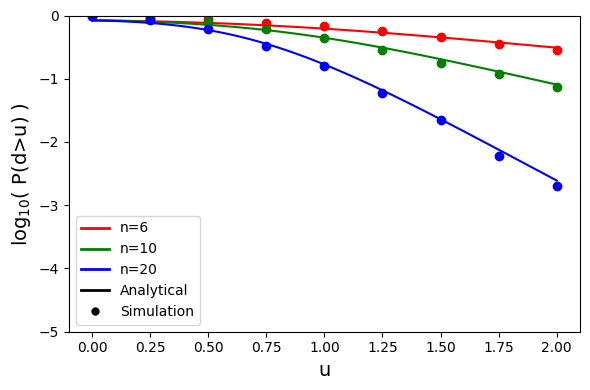

In [7]:

# analytical survival functions:
n      = [6, 10, 20]
sf0    = e1d.stats.d2p(u0, n, dim=1, design='2sample', Q=Q, fwhm=fwhm)


# simulate:
np.random.seed(4)
sf1    = []
for nn in n:
    d  = []
    for i in range(niter):
        y0  = rft1d.randn1d(int(nn/2), Q, fwhm)
        y1  = rft1d.randn1d(int(nn/2), Q, fwhm)
        d.append( e1d.stats.d_2sample(y0, y1).max() )
    dmax = np.asarray( d )
    f    = np.array(   [(dmax>uu).mean()  for uu in u1]   )
    f[f==0] = np.nan
    sf1.append( f )
sf1    = np.array( sf1 )
plot_results(u0, sf0, u1, sf1)
